# 로또 데이터 분석 개요

로또는 조작일까? 아닐까? 매주 평균 약 10명정도의 1등 당첨자가 나오면 1년에는 거의 500명 가까이가 1등에 당첨된다. 평균적인 당첨금액은 12억이다. 로또 조작을 주장하는 사람들은 다음과 같이 말한다:
1. 정부가 서민이 벼락부자되는 것을 막기 위해서 유령 당첨자를 꾸준히 집어넣고 있다. 매주 10명이 나오는 건 말이 안된다.
2. 실제로 당첨되는 사례를 보면 수동으로 여러개 당첨된 정황도 있다.
3. 로또 번호 추첨은 실시간이 아니다. 약 실제 방송보다 10분정도 먼저 추첨이 진행된다고 한다. 그 사이에 조작을 하려면 충분히 할만한 시간이다. 

로또를 가끔씩 구입한다. 그런데 구입할 때 마다 5줄에서 단 1,2 개 정도만 일치한다. 
그래서 생각을 해봤다. 만약 로또가 조작이라면 어떤 패턴이 있지 않을까? 좀 더 편향된 확률을 갖는 경향이 있지 않을까?
이런 요행을 바라는 생각에서 해당 데이터 분석을 진행하게 됐다. 맞다. 부자되고 싶어서 데이터 분석을 진행한다.

1047회차까지 분석

# Raw Data

web scraping으로 가져오기가 쉽지 않아서(버튼, POST, Selection 등) 그냥 엑셀 파일을 다운 받는 것으로 한다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#웹스크래핑으로 필요한 정보 가져오기
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time


def web_scraping_total_sum():
    total_sum = []

    driver = webdriver.Chrome()
    driver.get('https://dhlottery.co.kr/gameResult.do?method=byWin')


    dropdown = driver.find_element(By.ID, "dwrNoList")
    button = driver.find_element(By.ID, "searchBtn")
    options = dropdown.find_elements(By.TAG_NAME, "option")
    for idx in range(len(options)):
        dropdown = driver.find_element(By.ID, "dwrNoList")
        button = driver.find_element(By.ID, "searchBtn")
        options = dropdown.find_elements(By.TAG_NAME, "option")
        option = options[idx]
        option.click()
        driver.execute_script("arguments[0].click();", WebDriverWait(driver, 20).until(EC.element_to_be_clickable(button)))
        res = ''
        for idx in driver.find_elements(By.CSS_SELECTOR, ".list_text_common"):
            res += idx.text
        total_sum.append(res)    
    return total_sum

#res = web_scraping_total_sum()
# res2 = list(map(lambda x : int(x.split()[-1][:-1].replace(',', '')), res))
# res2
# f = open("total_games.csv", "w")
# for item in res2:
#     f.write("%s\n"%item)
# f.close()
res = pd.read_csv('total_games.csv', header=None)
res.index = list(range(1047,0,-1))
res.iloc[:, 0] = res.iloc[:, 0].map(lambda x : int(x / 1000))

In [3]:
#데이터 전처리 
df = pd.read_csv('rawdata.csv')
df.drop(df.iloc[:,0].name, axis = 1, inplace = True)
df.drop([0, 1], inplace = True)
df.reset_index(inplace =True)
df.drop('index', axis = 1, inplace = True)

df.columns = ['game_no','date', '1st', '1st_prize', '2nd', '2nd_prize', 
             '3rd', '3rd_prize', '4th', '4th_prize', '5th', '5th_prize',
             '1', '2', '3', '4', '5', '6', '+']
game_1047 = ['1047', '2022.12.24', '9', '2,748,797,875', '83', '49,677,071', '2,728', '1,511,436', '139,530', '50,000', '2,313,403', '5,000', 2, 20, 33, 40, 42, 44, 32]
df = df.append(pd.DataFrame([game_1047], columns=df.columns), ignore_index=True)
df.index = df['game_no'].map(int)
df = df.drop('game_no', axis = 1)
df = df.sort_index(ascending=False)
df['total'] = res
df

,date,1st,1st_prize,2nd,2nd_prize,3rd,3rd_prize,4th,4th_prize,5th,5th_prize,1,2,3,4,5,6,+,total
game_no,,,,,,,,,,,,,,,,,,,
1047,2022.12.24,9,"2,748,797,875",83,"49,677,071","2,728","1,511,436","139,530","50,000","2,313,403","5,000",2,20.0,33.0,40.0,42.0,44.0,32,103058179
1046,2022.12.17,12,"2,011,415,719",57,"70,575,991","2,959","1,359,524","139,560","50,000","2,260,269","5,000",7,16.0,25.0,29.0,35.0,36.0,28,100923993
1045,2022.12.10,13,"1,990,060,443",67,"64,355,189","2,699","1,597,554","135,872","50,000","2,280,432","5,000",6,14.0,15.0,19.0,21.0,41.0,37,105380282
1044,2022.12.03,8,"3,136,941,235",72,"58,091,505","2,597","1,610,547","134,226","50,000","2,254,796","5,000",12,17.0,20.0,26.0,28.0,36.0,4,102891973
1043,2022.11.26,17,"1,468,646,956",86,"48,385,656","3,156","1,318,494","155,087","50,000","2,495,858","5,000",3,5.0,12.0,22.0,26.0,31.0,19,107045942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2003.01.04,0,0,0,0,42,"6,033,800","3,043","166,500","60,434","10,000",16,24.0,29.0,40.0,41.0,42.0,3,6277102
4,2002.12.28,0,0,1,"211,191,200",29,"7,282,400","2,777","152,100","52,382","10,000",14,27.0,30.0,31.0,40.0,42.0,2,5271464
3,2002.12.21,1,"2,000,000,000",0,0,139,"1,174,100","5,940","54,900","73,256","10,000",11,16.0,19.0,21.0,27.0,31.0,30,4729342


In [4]:
#날짜 정보 년, 월로 분리하고 데이터 프레임의 기존 날짜 정보와 교체하기
date_format = df['date'].map(lambda x : x.split('.'))
year = date_format.map(lambda x : x[0])
month = date_format.map(lambda x : x[1])
df.drop('date', axis=1, inplace = True)
df.loc[:,'year'] = year
df.loc[:,'month'] = month

In [5]:
# 데이터 프레임 column 위치 reorder하기
new_column_order = list([df.columns[0]]) + list(df.columns[-2:]) + list(df.columns[1:-2])
new_column_order
df = df[new_column_order]

# Q1. 상금 통계량 확인하기

과연 각각의 상금과 관련된 값들은 어떤 통계량을 갖고 있는지 대략 확인한다.

In [6]:
#통계량을 구하기 위해서는 데이터의 타입이 int형일 필요가 있다. 현재 모든 데이터들이 문자형으로 저장되어 있어서
#제대로 된 통계량이 나오지 않고 있다. 

target= ['1st', '1st_prize', '2nd', '2nd_prize', '3rd', '3rd_prize',
          '4th', '4th_prize','5th', '5th_prize'] 
for col in target:
    df[col] = df[col].map(lambda x : x.replace(',', ''))
    df[col] = df[col].map(int)


In [7]:
df = df.astype(int)

In [8]:
info = df.describe()

In [9]:
# 조단위 까지만 구현
def division2String(val, div):
    if val % div:
        return str(int(val%div))
    else:
        return ''

def unitInKorean(value):
    if type(value) != int:
        return value
    
    res = division2String(value, 1e4)
    value = value // 1e4
    if value:
        res = division2String(value, 1e4) + '만 ' + res
        value = value // 1e4
    if value:
        res = division2String(value, 1e4) + '억 ' + res
        value = value // 1e4
    if value:
        res = division2String(value, 1e4) + '조 ' + res
    if res == '':
        return '0'
    else:
        return res

In [10]:
# 통계량을 한국어 단위로 변환하기
for idx in range(10):
    info.iloc[:, idx] = info.iloc[:, idx].map(int).map(unitInKorean)

In [11]:
prize_stat = info.loc[['max', 'mean', 'min', '25%', '50%']].iloc[:,:13]
prize_stat

,1st,year,month,1st_prize,2nd,2nd_prize,3rd,3rd_prize,4th,4th_prize,5th,5th_prize,1
max,50,2022,12,407억 2295만 9400,236,7억 6945만 6500,1만 1247,930만 7100,70만 3234,26만,3.410846e+06,10000.000000,35.000000
mean,7,2012,6,27억 1370만 9116,44,6408만 8771,1714,160만 514,8만 4167,5만 8082,1.378470e+06,5415.472779,6.663801
min,0,2002,1,0,0,0,28,62만 7634,2537,2만 7300,4.015500e+04,5000.000000,1.000000
25%,5,2007,4,15억 3941만 7019,32,4912만 142,1271,135만 2378,6만 2938,5만,1.039282e+06,5000.000000,2.000000
50%,7,2012,7,20억 7896만 9954,42,5721만 9946,1561,148만 1277,7만 7138,5만,1.267826e+06,5000.000000,5.000000


### Q1 분석결과-1
1. 역대 1등 최대 당첨자 수가 무려 50명이다.
2. 평균적으로 7명정도가 매주 1등 당첨된다고 볼 수 있다.
3. 보통 20억 내외로 1등 당첨금을 받는다.
4. 부산인구에 상당하는 수가 5등당첨으로 1만원을 탄 적이 있다.

In [12]:
df

,1st,year,month,1st_prize,2nd,2nd_prize,3rd,3rd_prize,4th,4th_prize,5th,5th_prize,1,2,3,4,5,6,+,total
game_no,,,,,,,,,,,,,,,,,,,,
1047,9,2022,12,2748797875,83,49677071,2728,1511436,139530,50000,2313403,5000,2,20,33,40,42,44,32,103058179
1046,12,2022,12,2011415719,57,70575991,2959,1359524,139560,50000,2260269,5000,7,16,25,29,35,36,28,100923993
1045,13,2022,12,1990060443,67,64355189,2699,1597554,135872,50000,2280432,5000,6,14,15,19,21,41,37,105380282
1044,8,2022,12,3136941235,72,58091505,2597,1610547,134226,50000,2254796,5000,12,17,20,26,28,36,4,102891973
1043,17,2022,11,1468646956,86,48385656,3156,1318494,155087,50000,2495858,5000,3,5,12,22,26,31,19,107045942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0,2003,1,0,0,0,42,6033800,3043,166500,60434,10000,16,24,29,40,41,42,3,6277102
4,0,2002,12,0,1,211191200,29,7282400,2777,152100,52382,10000,14,27,30,31,40,42,2,5271464
3,1,2002,12,2000000000,0,0,139,1174100,5940,54900,73256,10000,11,16,19,21,27,31,30,4729342


In [13]:
over20winners = df[df.loc[:,'1st'] >= 20].copy()
for col in over20winners.columns:
    over20winners.loc[:,col] = over20winners.loc[:,col].map(unitInKorean)
over20winners = over20winners.iloc[:, :-7]
over20winners

,1st,year,month,1st_prize,2nd,2nd_prize,3rd,3rd_prize,4th,4th_prize,5th,5th_prize,1
game_no,,,,,,,,,,,,,
1042,20,2022,11,12억 4066만 3669,100,4135만 5456,3567,115만 9391,15만 7156,5만,246만 2593,5000,5
1041,25,2022,11,9억 3509만 1165,85,4583만 7803,3947,98만 7133,16만 7535,5만,262만 869,5000,6
1028,20,2022,8,11억 8123만 5132,91,4326만 8687,2810,140만 1228,14만 2778,5만,233만 3653,5000,5
1019,50,2022,6,4억 3856만 5140,75,4872만 9460,5823,62만 7634,19만 2646,5만,250만 6493,5000,1
1000,22,2022,1,12억 4681만 9620,109,4194만 1945,4018,113만 7798,18만 52,5만,274만 7686,5000,2
972,20,2021,7,11억 2488만 6244,80,4687만 261,2570,145만 8997,12만 6989,5만,212만 2398,5000,3
969,20,2021,6,11억 4942만 7894,56,6841만 8328,2633,145만 5157,13만 3079,5만,221만 1803,5000,3
910,21,2020,5,9억 4131만 6375,72,4575만 8435,2694,122만 2943,12만 8516,5만,207만 4354,5000,1
777,21,2017,10,8억 3346만 8036,66,4419만 9063,2413,120만 8926,11만 1938,5만,176만 6635,5000,6


In [14]:
len(over20winners)

13

### Q1 분석결과-2
1. 1등 당첨자가 20명 이상 나온 게임은 총 13게임이다. 
2. 대부분 비교적 최근(2017년 아후)에 나온 게임들이다. 
3. 올해(2022년)에만 5게임에서 20명 이상의 당첨자가 나왔다. 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes:xlabel='Count', ylabel='1st'>

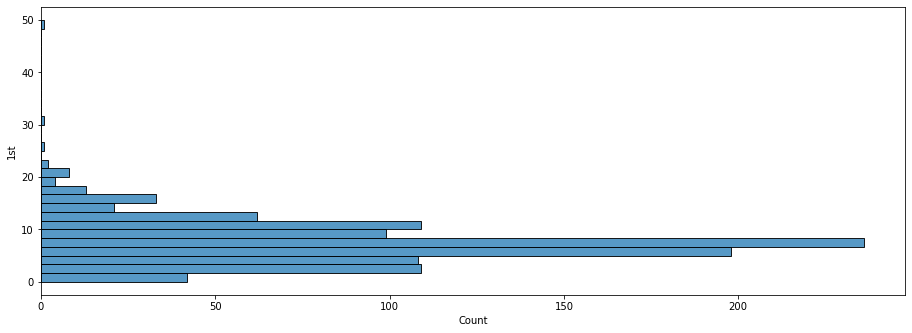

In [16]:
# 1등 당첨자수 분포
fig = plt.figure()
fig.add_axes([0,0,2,1])
sns.histplot(y=df['1st'],bins=30)

<Axes:xlabel='game_no', ylabel='total'>

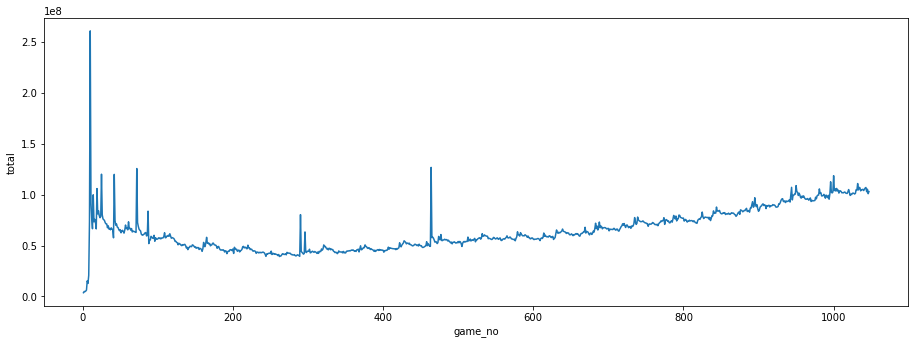

In [17]:
# 역대 게임 참가자 수의 변화
fig = plt.figure()
fig.add_axes([0,0,2,1])
sns.lineplot(data = df.reset_index(), x= 'game_no', y= 'total' )

<AxesSubplot:xlabel='total'>

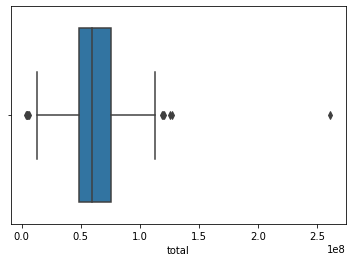

In [18]:
# 참여자수에서 outlier 확인 및 처리
sns.boxplot(data = df, x = 'total')

In [19]:
# 이 부분을 일시적으로 제거하자.
bdf = df[df['total'] < 2.5e8]

<Axes:xlabel='1st', ylabel='total'>

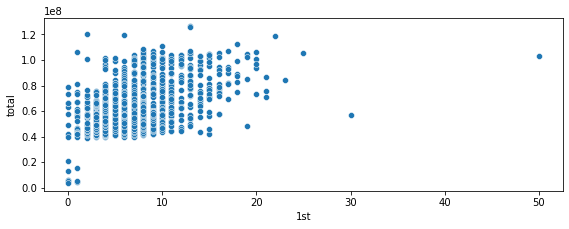

In [20]:
# 게임 참가자 수와 1등 당첨자수의 상관관계
fig = plt.figure()
fig.add_axes([0,0,1.2,0.6])
sns.scatterplot(data = bdf, x = '1st', y= 'total')

In [21]:
# 상관계수
bdf['1st'].corr(bdf['total'])

0.458246192457946

<Axes:xlabel='1st', ylabel='2nd'>

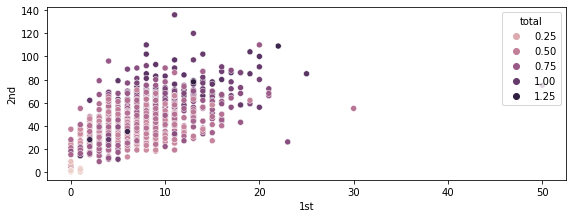

In [22]:
# 1등 당첨자 수와 2등 당첨자 수의 상관관계
fig = plt.figure()
fig.add_axes([0,0,1.2,0.6])
sns.scatterplot(data = bdf, x = '1st', y= '2nd', hue = 'total')

<Axes:xlabel='1st', ylabel='3rd'>

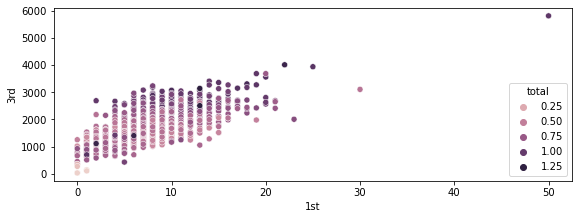

In [23]:
#1등 당첨자 수와 3등 당첨자 수의 상관관계
fig = plt.figure()
fig.add_axes([0,0,1.2,0.6])
sns.scatterplot(data = bdf, x = '1st', y= '3rd', hue='total')

<Axes:xlabel='1st', ylabel='4th'>

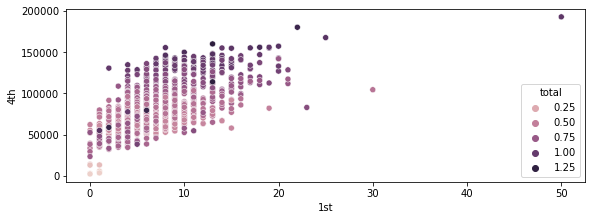

In [24]:
#1등 당첨자 수와 4등 당첨자 수의 상관관계
fig = plt.figure()
fig.add_axes([0,0,1.2,0.6])
sns.scatterplot(data = bdf, x = '1st', y= '4th', hue ='total')

<Axes:xlabel='1st', ylabel='5th'>

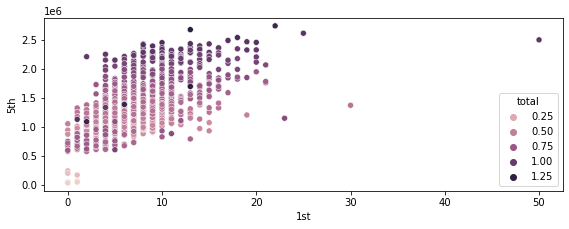

In [25]:
#1등 당첨자 수와 5등 당첨자 수의 상관관계
fig = plt.figure()
fig.add_axes([0,0,1.2,0.6])
sns.scatterplot(data = bdf, x = '1st', y= '5th', hue='total')

### Q1 분석결과-3 
1. 전반적으로 당첨자수는 게임 참여자수와 약간의 양의 상관관계가 있다.(당연한 얘기?)
2. 1등 당첨자수는 대부분 10명 안 쪽으로 몰려있는 경향이다. 

# Q2. 로또 번호 재등장 주기
이번에 등장한 로또 번호는 바로 직전에 등장했을까? 아니면 얼마만에 뽑힌 번호일까?

In [26]:
lucks = df.loc[ :, ['1','2','3','4','5','6','+']]
luck_nums = lucks.values.reshape(-1,lucks.size)[0]
lucks

,1,2,3,4,5,6,+
game_no,,,,,,,
1047,2,20,33,40,42,44,32
1046,7,16,25,29,35,36,28
1045,6,14,15,19,21,41,37
1044,12,17,20,26,28,36,4
1043,3,5,12,22,26,31,19
...,...,...,...,...,...,...,...
5,16,24,29,40,41,42,3
4,14,27,30,31,40,42,2
3,11,16,19,21,27,31,30


<AxesSubplot:ylabel='Count'>

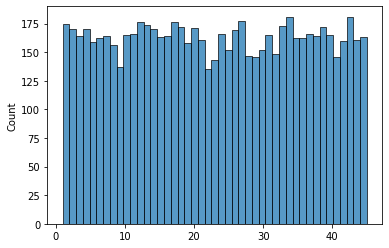

In [27]:
# 로또 번호들의 등장 분포
sns.histplot(luck_nums, bins = 45)

In [28]:
#매 게임 로또 번호들의 평균과 분산은?
luck_means = lucks.apply(np.mean,axis=1).map(lambda x : float('% .2f'%x))
luck_std   = lucks.apply(np.std ,axis=1).map(lambda x : float('% .2f'%x))

<AxesSubplot:ylabel='Count'>

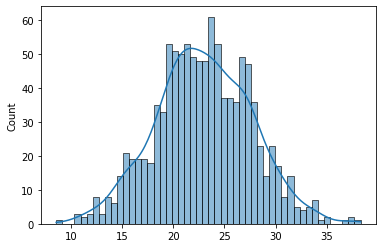

In [29]:
#매 게임 번호 평균들의 분포
sns.histplot(luck_means, bins = 50, kde= True)

<AxesSubplot:ylabel='Count'>

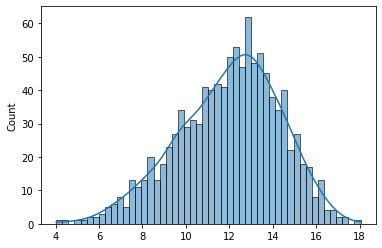

In [30]:
#매 게임 표준 편차들의 분포
sns.histplot(luck_std, bins = 50, kde=True)

In [31]:
# 재등장 주기는 어떻게 될까?
lucks_re = lucks.copy()
lucks_re

,1,2,3,4,5,6,+
game_no,,,,,,,
1047,2,20,33,40,42,44,32
1046,7,16,25,29,35,36,28
1045,6,14,15,19,21,41,37
1044,12,17,20,26,28,36,4
1043,3,5,12,22,26,31,19
...,...,...,...,...,...,...,...
5,16,24,29,40,41,42,3
4,14,27,30,31,40,42,2
3,11,16,19,21,27,31,30


In [32]:
for game_idx in range(len(lucks)):
    res = np.zeros(7)
    left = np.array(lucks.iloc[game_idx])
    
    # 아직 모든 res가 구해지지 않은 경우 계속해서 이전 게임을 탐색한다
    prev_game_idx = game_idx + 1
    while 0 in res:
        try:
            prev_game = np.array(lucks.iloc[prev_game_idx])
        except:

            break
        
        # 재등장주기가 아직 구해지지 않은 번호에 대해서만 탐색을 한다
        for idx in range(7):

            #만약 재등장 주기가 구해졌다면 skip
            if res[idx] > 0:
                continue
                
            #아니라면 이전 게임에 해당 번호가 등장했는지 확인하기
            if left[idx] in prev_game:
                res[idx] = prev_game_idx - game_idx
        prev_game_idx += 1
        
    lucks_re.iloc[game_idx] = res
    
lucks_re

,1,2,3,4,5,6,+
game_no,,,,,,,
1047,8,3,10,13,12,9,11
1046,5,6,21,6,11,2,2
1045,4,3,3,2,27,10,7
1044,1,3,11,1,12,4,2
1043,4,1,11,6,3,3,4
...,...,...,...,...,...,...,...
5,2,0,4,1,0,1,0
4,0,1,1,1,3,2,2
3,0,2,0,1,0,0,0


In [45]:
#재등장 주기표 전처리 하기 
#회차가 초반이어서 재등장이 아예 일어나지 않은 경우는 0 이외의 값들의 재등장 횟수 평균값으로 채우기
lucks_reocurence = np.array(lucks_re)
lucks_reocurence[lucks_reocurence == 0] = int(lucks_reocurence[lucks_reocurence > 0].mean())
lucks_reocurence

array([[ 8,  3, 10, ..., 12,  9, 11],
       [ 5,  6, 21, ..., 11,  2,  2],
       [ 4,  3,  3, ..., 27, 10,  7],
       ...,
       [ 6,  2,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6]])

<Axes:ylabel='Count'>

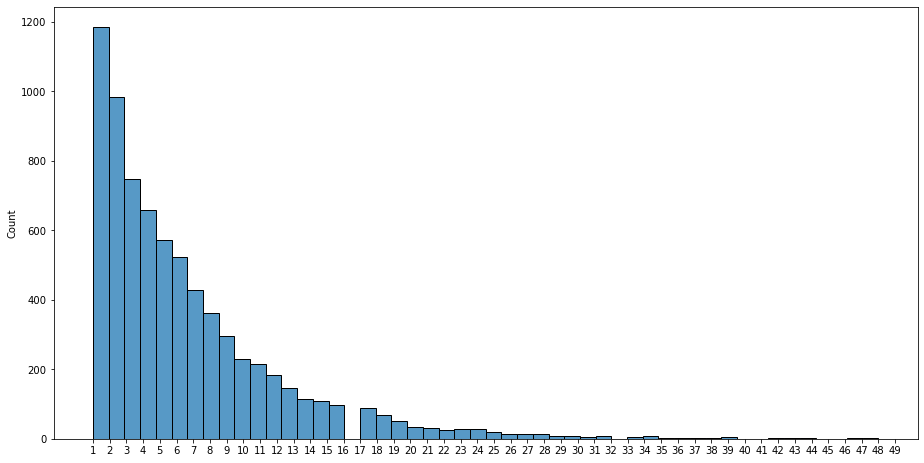

In [46]:
#재등장 주기의 분포
fig = plt.figure()
fig.add_axes([0,0,2,1.5])
plt.xticks(range(1,50))
sns.histplot(lucks_reocurence.reshape(-1,), bins = 50)

In [47]:
#각 게임 당 재등장 주기의 평균 및 표준편차
luck_re_df = pd.DataFrame(lucks_reocurence)
luck_re_means = luck_re_df.apply(np.mean, axis =1)
luck_re_std = luck_re_df.apply(np.std, axis = 1)

<AxesSubplot:ylabel='Count'>

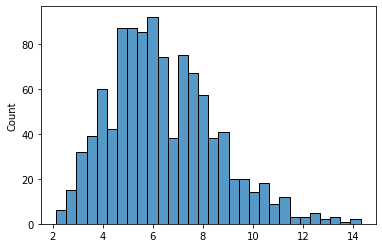

In [48]:
#각 게임 당 재등장 주기의 평균
sns.histplot(luck_re_means, bins = 30)

<AxesSubplot:ylabel='Count'>

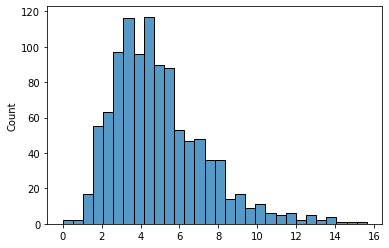

In [49]:
#각 게임 당 재등장 주기의 표준편차 
sns.histplot(luck_re_std, bins = 30)

### Q2. 분석결과 - 1
1. 평균적으로 6번의 재등장 주기를 갖는다. 
2. 놀랍게도 이전게임에서 나온 번호가 나올 확률이 꽤 크다. 그러나 단 하나의 번호만을 볼 때에 국한한다. 한 게임의 6개의 번호를 볼 때는 그렇지 않다.

# Q3. 로또 번호 유사도 측정하기
Hamming Distance 개념을 활용해서 로또 번호의 유사도를 측정한다. 
Hamming Distance를 활용한이유? 값이 다르면 아예 다른것이기 때문이다. 예를 들어 23과 24의 차이와 23과 25의 차이는 동일하다. 아무런 질적 차이를 보이지 않는다. 따라서 hamming distance를 선택했다. 

In [197]:
# Modified Hamming Distance 예시 -> 더 유사할 수록 더 높은 값을 갖도록 수정함
x = np.array([1,1,0,0])
y = np.array([0,1,1,1])
(x & y).sum()

1

In [110]:
# 각 게임에 나온 번호를 hamming code화 시킨다. 1 3 5 -> ...000000010101
def convertToHam(lucks):
    res = np.zeros(45)
    for luck in lucks:
        res[luck-1] = 1
    return res
lucks_ham = np.array(lucks.apply(convertToHam, axis = 1))
lucks_ham

array([array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
              0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])                       ,
       array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
              0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
              1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                       ,
       array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
              0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])                       ,
       ...,
       array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
              0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                       ,


In [209]:
# 모든 게임회차별 가능한 조합에 대한 hamming distance를 구한다. pairwise hamming distance O(n^2)
games = len(lucks)
mat_lotto = np.zeros((games, games))

for game in range(games):
    cur_ham = lucks_ham[game].astype(int)
    for cmp in range(games):
        cmp_ham = lucks_ham[cmp].astype(int)
        mat_lotto[game][cmp] = (cur_ham & cmp_ham).sum()
mat_lotto

#자기 자신과의 hamming distnace는 삭제한다
mat_lotto = mat_lotto - np.eye(games) * 7

In [219]:
# 각각의 게임 회차별 타 게임과의 hamming distance 내용 정보
hamming_points = np.apply_along_axis(np.sum , 1, mat_lotto)
hamming_means = np.apply_along_axis(np.mean , 1, mat_lotto)
hamming_std = np.apply_along_axis(np.std , 1, mat_lotto)

<AxesSubplot:ylabel='Count'>

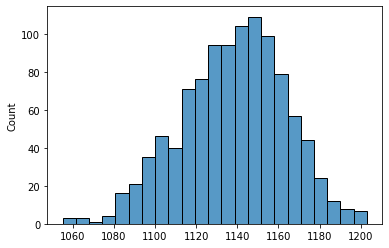

In [225]:
# hamming point의 총합
sns.histplot(hamming_points)

<AxesSubplot:ylabel='Count'>

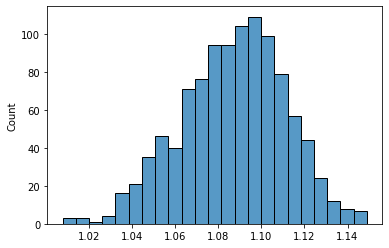

In [226]:
# hamming point의 평균의 분포 
sns.histplot(hamming_means)

<AxesSubplot:ylabel='Count'>

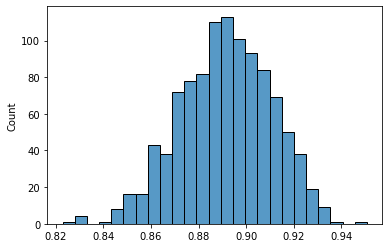

In [227]:
# hamming point의 표준편차의 분포
sns.histplot(hamming_std)

In [185]:
#index0(가장최근)게임의 hamming distance들은 다음과 같다. 
mat_lotto[0]

array([0., 0., 0., ..., 0., 3., 2.])

In [202]:
#유사도의 전체적인 분포는 어떻게 될까? 이때 행렬이 대칭 행렬이므로 upper part만 취하도록 한다. 
ham_dist = np.array([])
begin = 1
for idx in range(len(mat_lotto)):
    ham_dist = np.concatenate((ham_dist, mat_lotto[idx][begin:]))
    begin += 1

<AxesSubplot:ylabel='Count'>

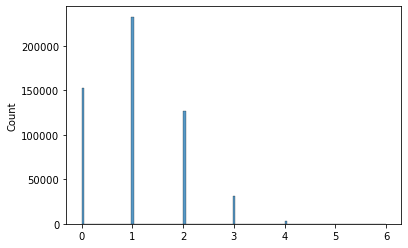

In [208]:
# 중복을 제거한 pairwise hamming distance의 분포
plt.xticks(range(8))
sns.histplot(ham_dist.reshape(-1,))

In [169]:
#최대값 hamming distance(가장 유사한 번호 조합)의 게임의 인덱스는 무엇인가?
max_idx = mat_lotto.argmax(axis = 1)
max_idx

array([103, 255, 134, ...,  40, 103,  32])

In [181]:
#최대 dist는 지금으로 부터 얼마전인가?
max_dist = max_idx - np.array(range(len(max_idx)))
max_dist

array([  103,   254,   132, ..., -1004,  -942, -1014])

<AxesSubplot:ylabel='Count'>

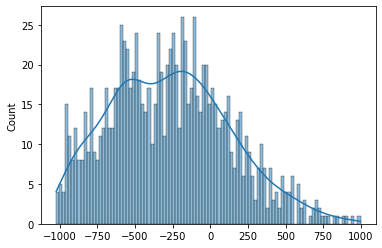

In [183]:
#가장 유사했던 게임회차 차이의 분포는?
sns.histplot(max_dist, kde= True, bins = 100)